# Simulações Computacionais Método Magnetotelúrico

##  Visualização das Séries temporais 

### Dados da Bacia de Iguatu

Equipamento de aquisição MT1 da EMI 

Data de aquisição 2004

Arranjo em L

<h2 align="center">Importando Bibliotecas Importantes <h2> 

In [1]:
import numpy as np
import matplotlib.gridspec as gridspec
import glob
import pandas as pd
import math as math
import pylab
from matplotlib import pyplot as plt
import os
%matplotlib inline

<h2 align="center">  Importando o dado MT </h2> 

In [80]:
timeseries1 = glob.glob('*ts1.txt')
timeseries3 = glob.glob('*ts3.txt')
timeseries4 = glob.glob('*ts4.txt')

<h3 align="left"> Banda TS1 </h3>

In [53]:
timeseries1

['04I0012_Hx-1ts1.txt',
 '04I0012_Ey-1ts1.txt',
 '04I0012_Hz-1ts1.txt',
 '04I0012_Hy-1ts1.txt',
 '04I0012_Ex-1ts1.txt']

In [69]:
Ex1 = np.genfromtxt(timeseries1[4], skip_header=14)
Ey1 = np.genfromtxt(timeseries1[1], skip_header=14)
Hx1 = np.genfromtxt(timeseries1[0], skip_header=14)
Hy1 = np.genfromtxt(timeseries1[3], skip_header=14)
Hz1 = np.genfromtxt(timeseries1[2], skip_header=14)

In [70]:
print(Ex1)
print(Ey1)
print(Hx1)
print(Hy1)
print(Hz1)

[ 6.710815  7.336426  7.446289 ... -1.373291 -1.431274 -1.446533]
[-4.566619  -4.610046  -4.640928  ... -0.5327079 -0.5249875 -0.2161713]
[ 3.136414  3.078511  2.123111 ... -2.731093 -1.978354 -1.843246]
[-2.035522  -2.191162  -2.526855  ...  0.2044678 -0.1342773  0.0213623]
[ 36.08324  39.00734  38.68887 ... -22.55323 -22.88135 -22.84274]


In [71]:
TS1 = [Ex1,Ey1,Hx1,Hy1,Hz1]

<h2 align="left">  Plot </h2>  



In [74]:
header=('Ex','Ey', 'Hx', 'Hy', 'Hz')

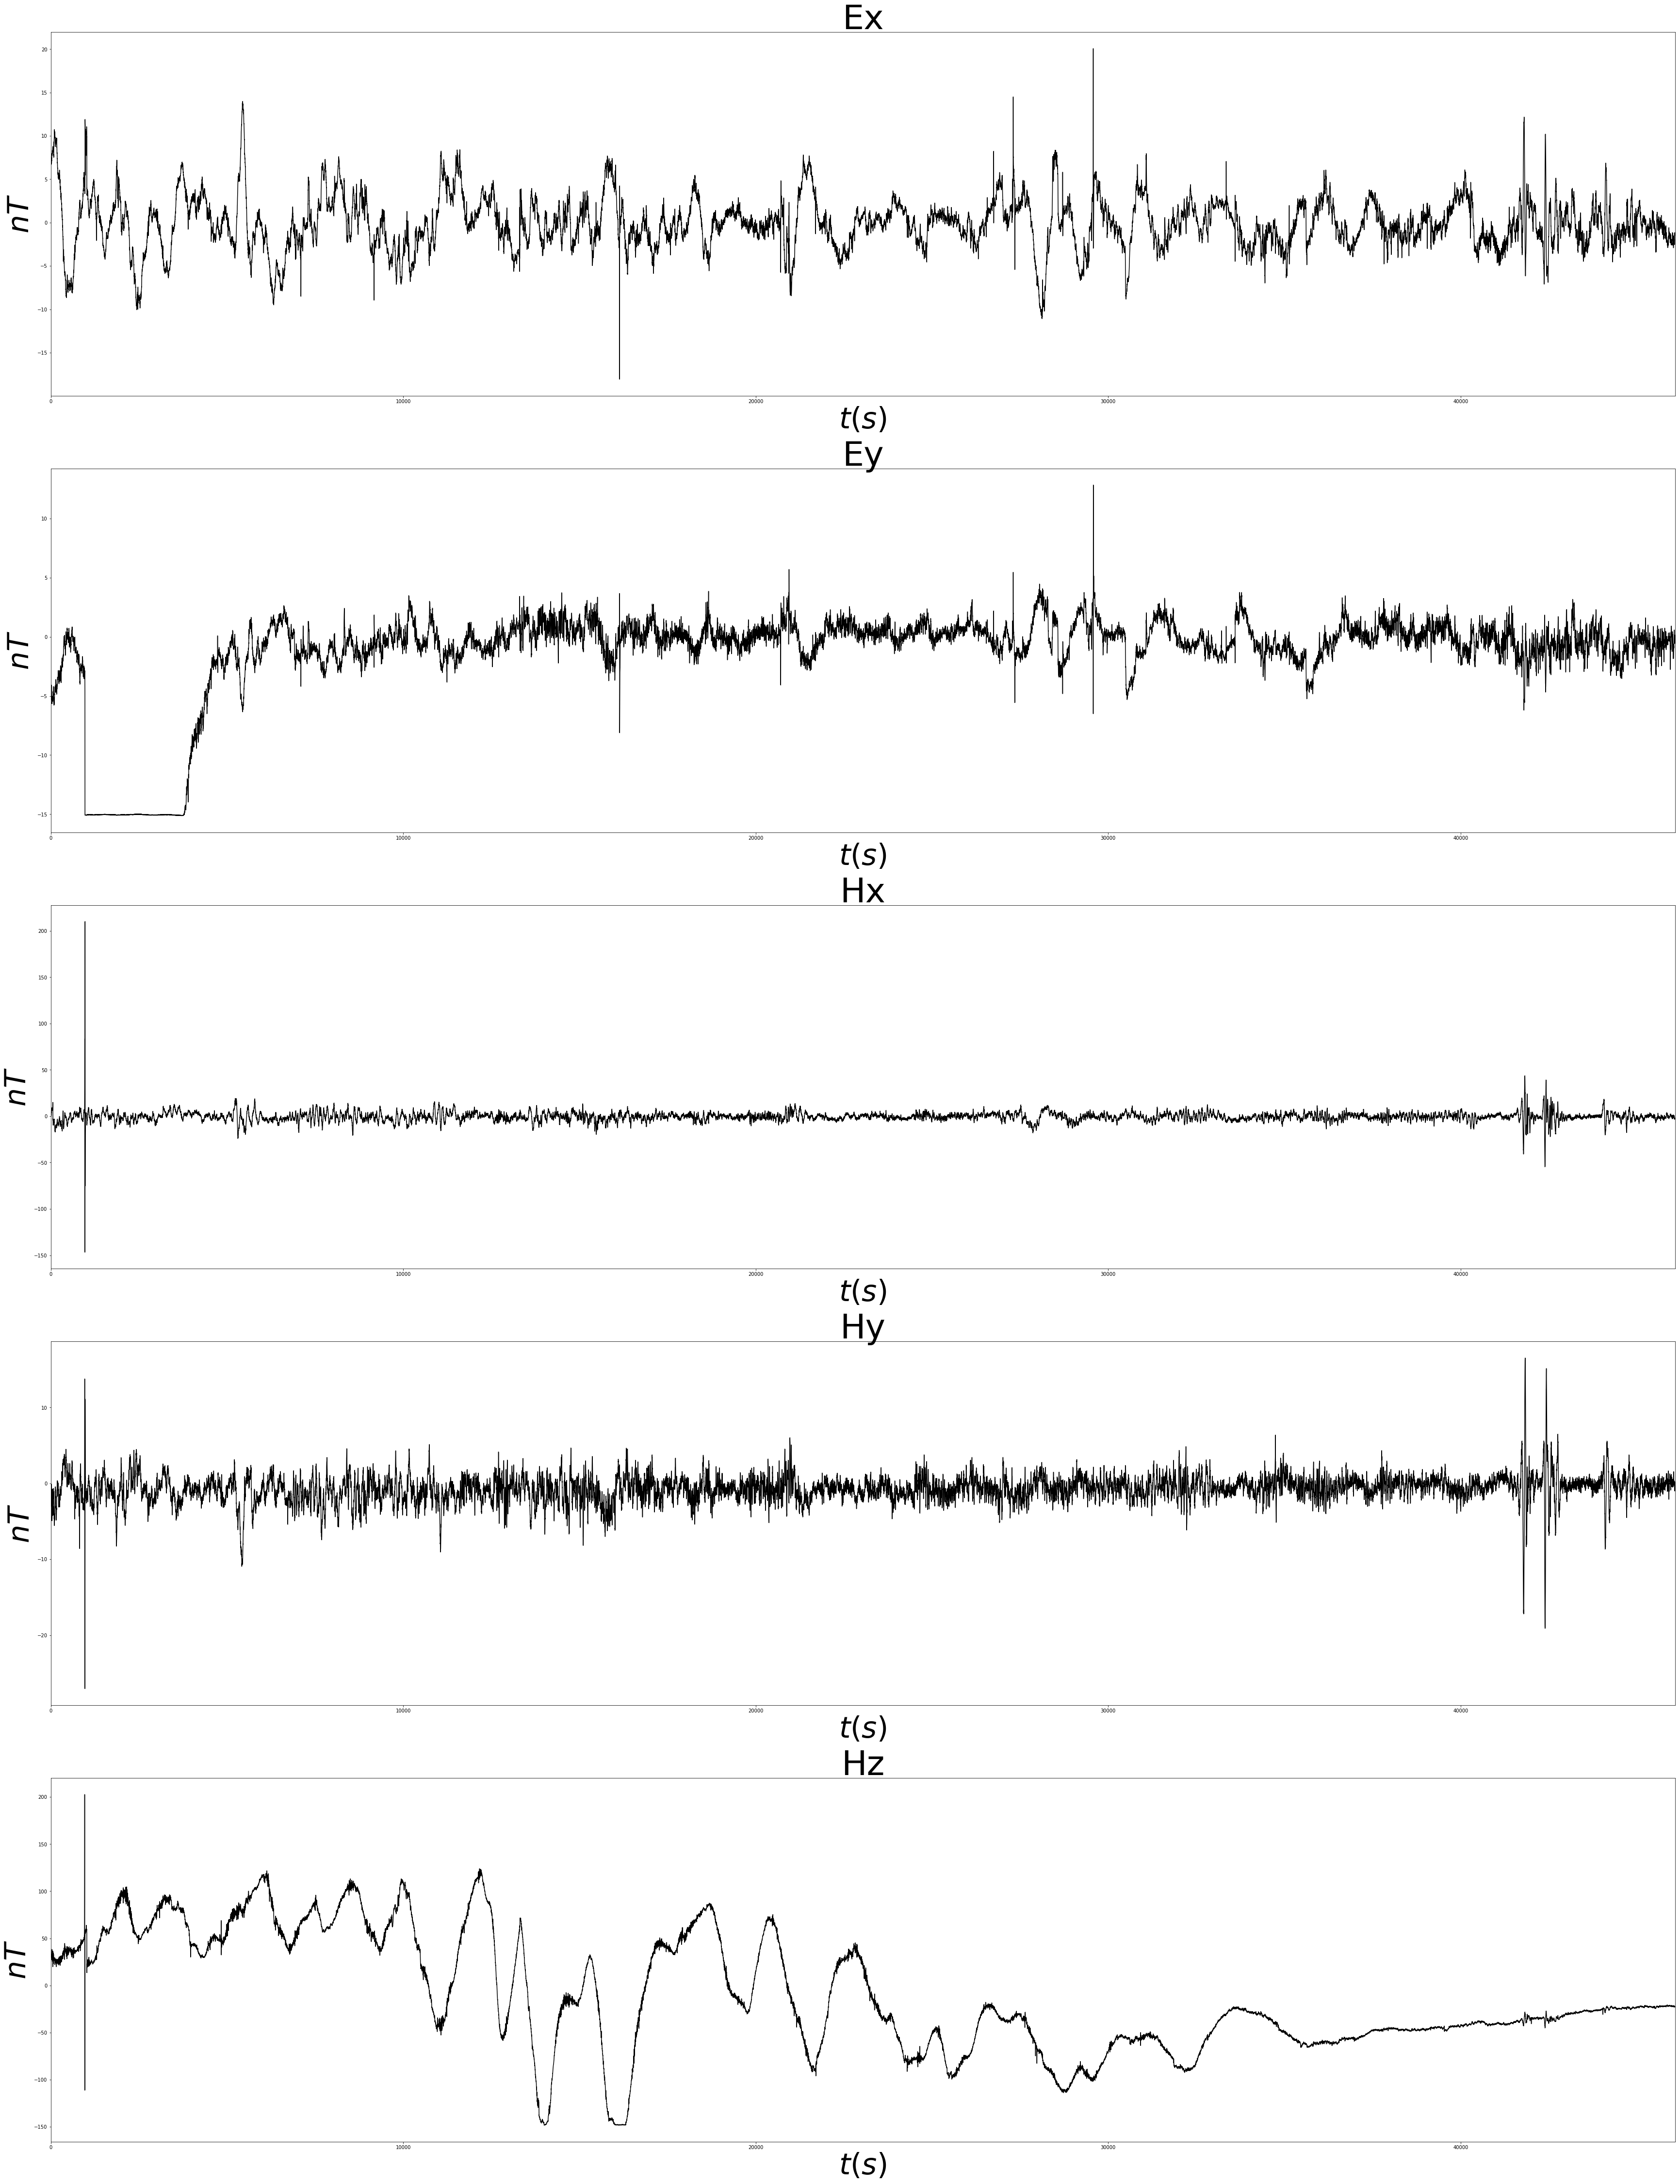

In [75]:
fig = plt.figure(figsize=(60,80))
gs1 = gridspec.GridSpec(len(TS1),1)

for i,j in enumerate(TS1):
    ax = fig.add_subplot(gs1[i])
    ax.set_title(header[i],fontsize=70)
    plt.ylabel('$nT$', fontsize=60)
    plt.xlabel('$t(s)$', fontsize=60)
    ax.plot(np.arange(len(TS1[0])),j,'k')
    ax.set_xlim(min(np.arange(len(TS1[0]))),max(np.arange(len(TS1[0]))))

<h3 align="left"> Banda TS3 </h3>

In [81]:
timeseries3

['04I0011_Hz-1ts3.txt',
 '04I0011_Ey-1ts3.txt',
 '04I0011_Hy-1ts3.txt',
 '04I0011_Ex-1ts3.txt',
 '04I0011_Hx-1ts3.txt']

In [82]:
Ex3 = np.genfromtxt(timeseries1[3], skip_header=14)
Ey3 = np.genfromtxt(timeseries1[1], skip_header=14)
Hx3 = np.genfromtxt(timeseries1[4], skip_header=14)
Hy3 = np.genfromtxt(timeseries1[2], skip_header=14)
Hz3 = np.genfromtxt(timeseries1[0], skip_header=14)

In [83]:
print(Ex3)
print(Ey3)
print(Hx3)
print(Hy3)
print(Hz3)

[-2.035522  -2.191162  -2.526855  ...  0.2044678 -0.1342773  0.0213623]
[-4.566619  -4.610046  -4.640928  ... -0.5327079 -0.5249875 -0.2161713]
[ 6.710815  7.336426  7.446289 ... -1.373291 -1.431274 -1.446533]
[ 36.08324  39.00734  38.68887 ... -22.55323 -22.88135 -22.84274]
[ 3.136414  3.078511  2.123111 ... -2.731093 -1.978354 -1.843246]


In [85]:
TS3 = [Ex3,Ey3,Hx3,Hy3,Hz3]

<h2 align="left">  Plot </h2>  

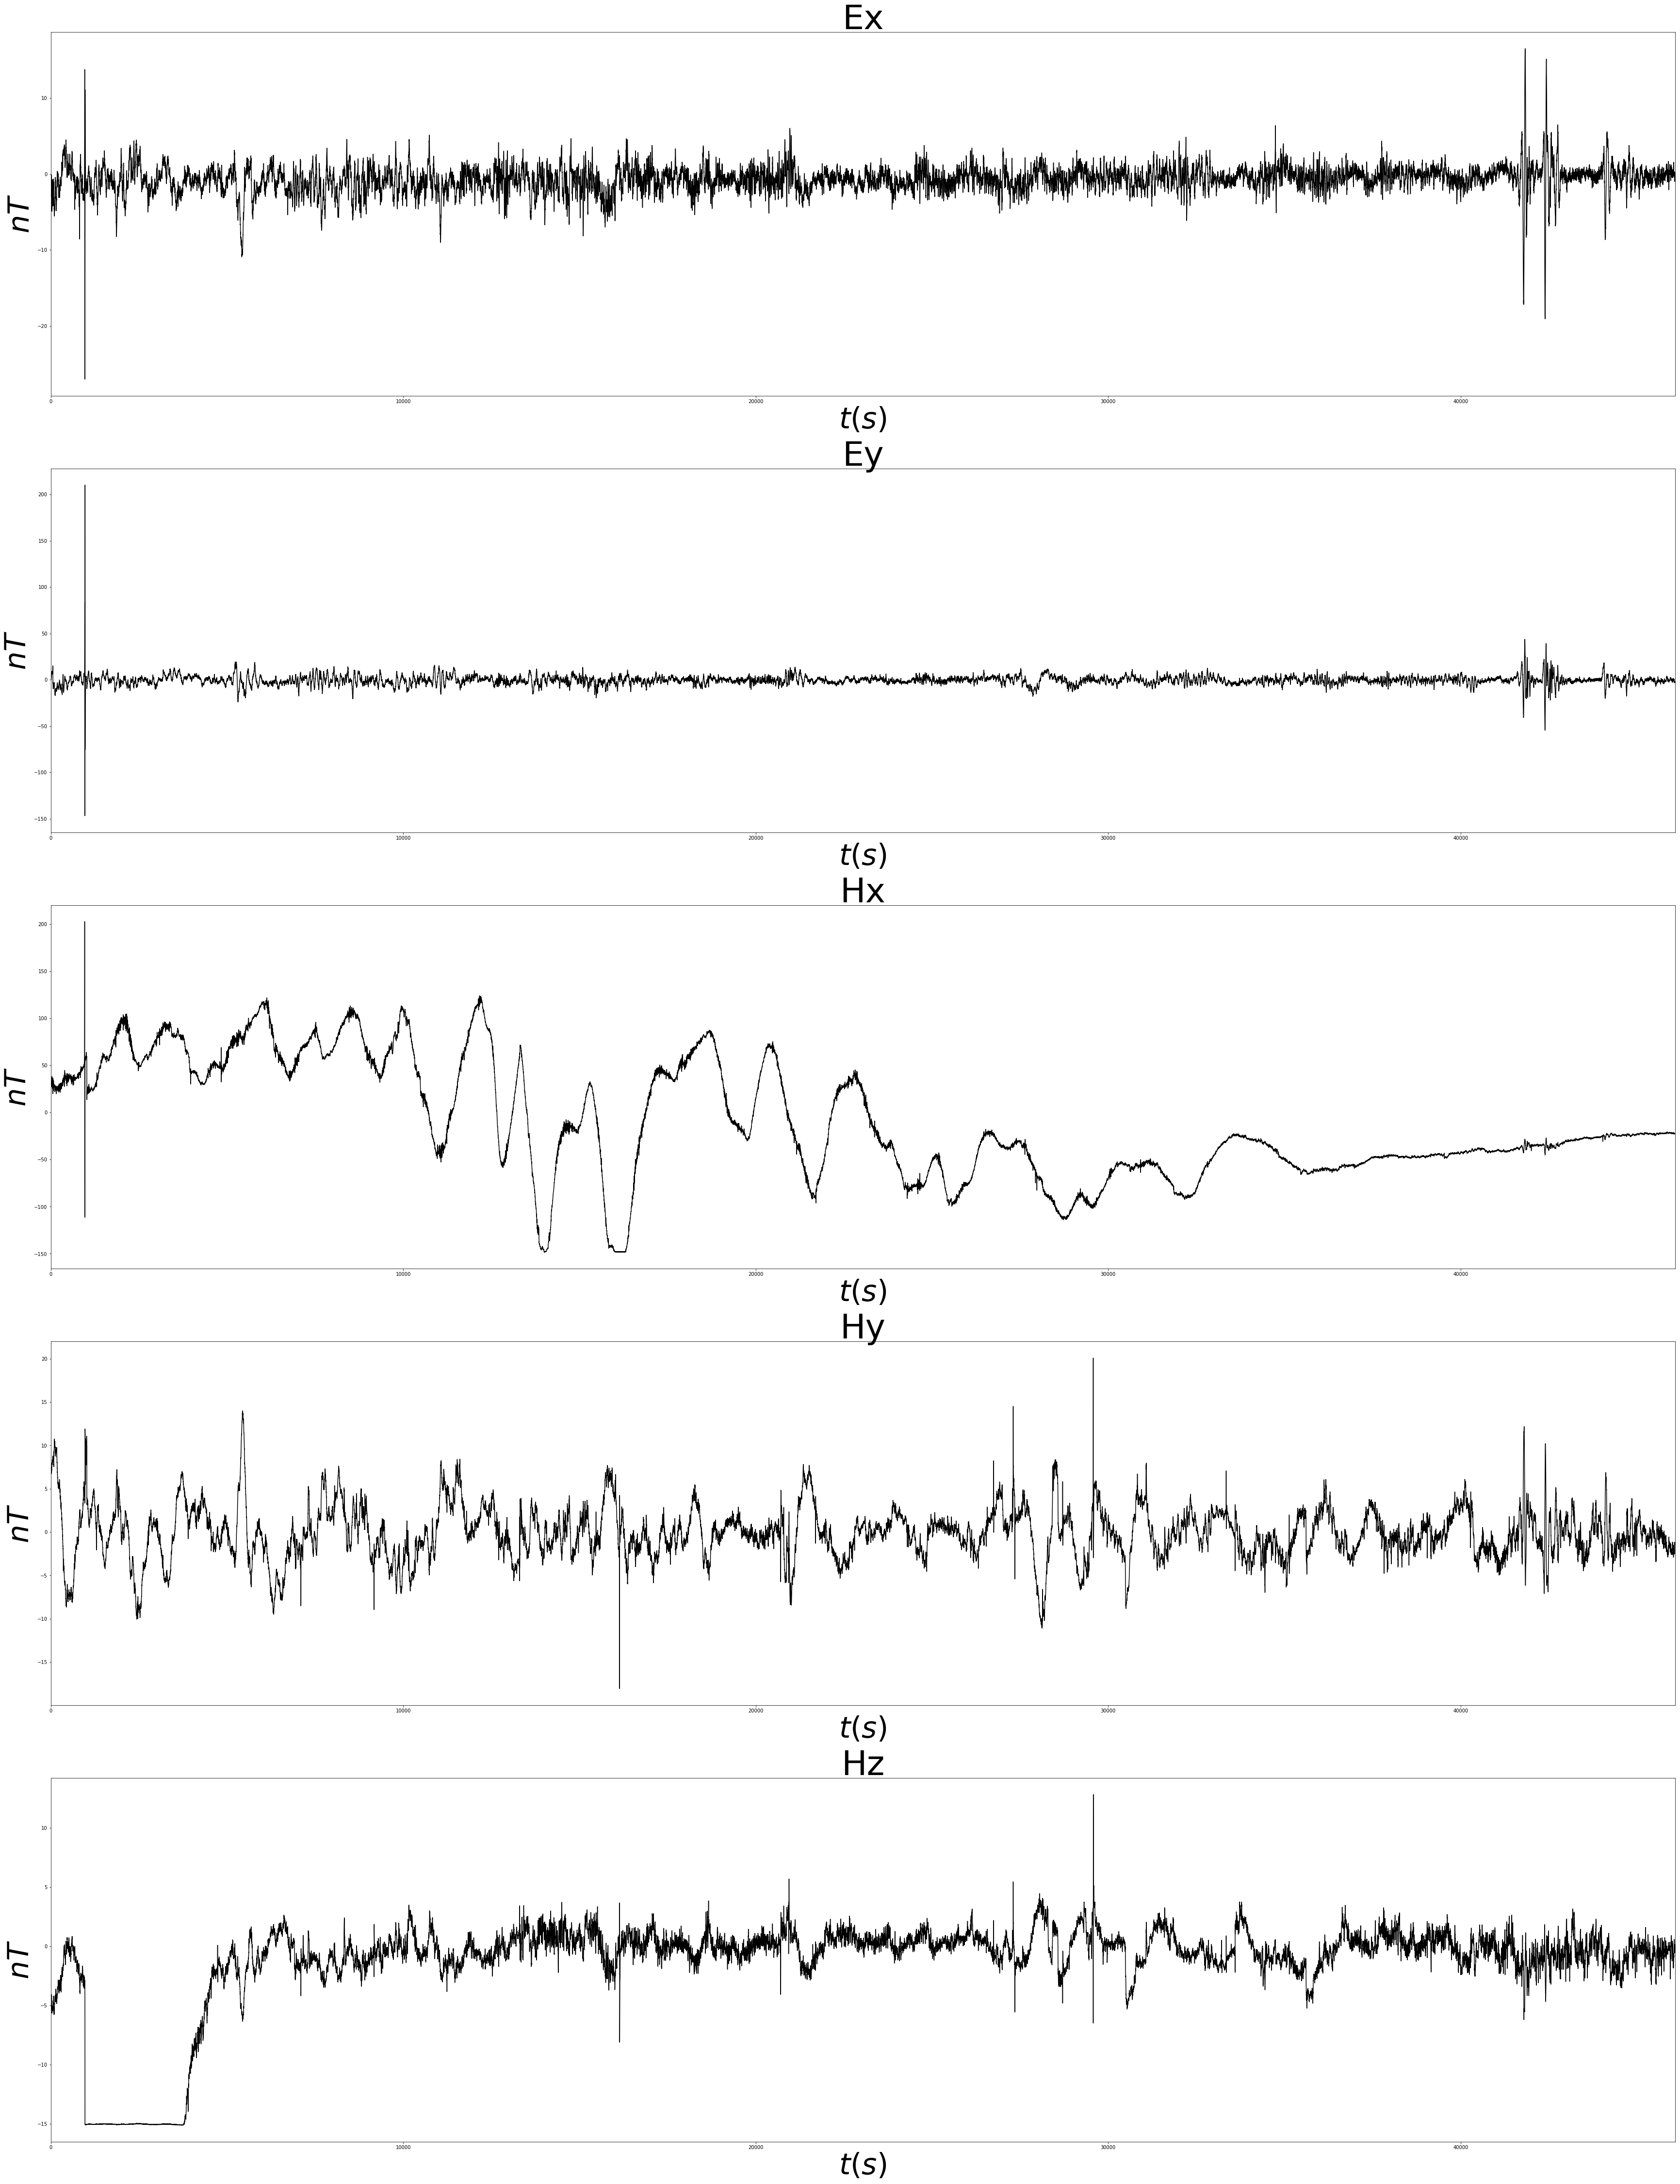

In [96]:
fig = plt.figure(figsize=(60,80))
gs1 = gridspec.GridSpec(len(TS3),1)

for i,j in enumerate(TS3):
    ax = fig.add_subplot(gs1[i])
    ax.set_title(header[i],fontsize=70)
    plt.ylabel('$nT$', fontsize=60)
    plt.xlabel('$t(s)$', fontsize=60)
    ax.plot(np.arange(len(TS3[0])),j,'k')
    ax.set_xlim(min(np.arange(len(TS3[0]))),max(np.arange(len(TS3[0]))))

<h3 align="left"> Banda TS4 </h3>

In [87]:
timeseries4

['04I0012_Ey-1ts4.txt',
 '04I0012_Hz-1ts4.txt',
 '04I0012_Hx-1ts4.txt',
 '04I0012_Ex-1ts4.txt',
 '04I0012_Hy-1ts4.txt']

In [88]:
Ex4 = np.genfromtxt(timeseries1[3], skip_header=14)
Ey4 = np.genfromtxt(timeseries1[0], skip_header=14)
Hx4 = np.genfromtxt(timeseries1[2], skip_header=14)
Hy4 = np.genfromtxt(timeseries1[4], skip_header=14)
Hz4 = np.genfromtxt(timeseries1[1], skip_header=14)

In [128]:
#Ex4 = Ex4[Ex4 < 10]
Ey4 = Ey4[Ey4 > -50]
Hz4 = Hz4[Hz4 > -10]

In [129]:
print(Ex4)
print(Ey4)
print(Hx4)
print(Hy4)
print(Hz4)

[-4.566619  -4.610046  -4.640928  ... -0.5327079 -0.5249875 -0.2161713]
[ 3.136414  3.078511  2.123111 ... -2.731093 -1.978354 -1.843246]
[ 36.08324  39.00734  38.68887 ... -22.55323 -22.88135 -22.84274]
[ 6.710815  7.336426  7.446289 ... -1.373291 -1.431274 -1.446533]
[-4.566619  -4.610046  -4.640928  ... -0.5327079 -0.5249875 -0.2161713]


In [130]:
TS4 = [Ex4,Ey4,Hx4,Hy4,Hz4]

<h2 align="left">  Plot </h2>  

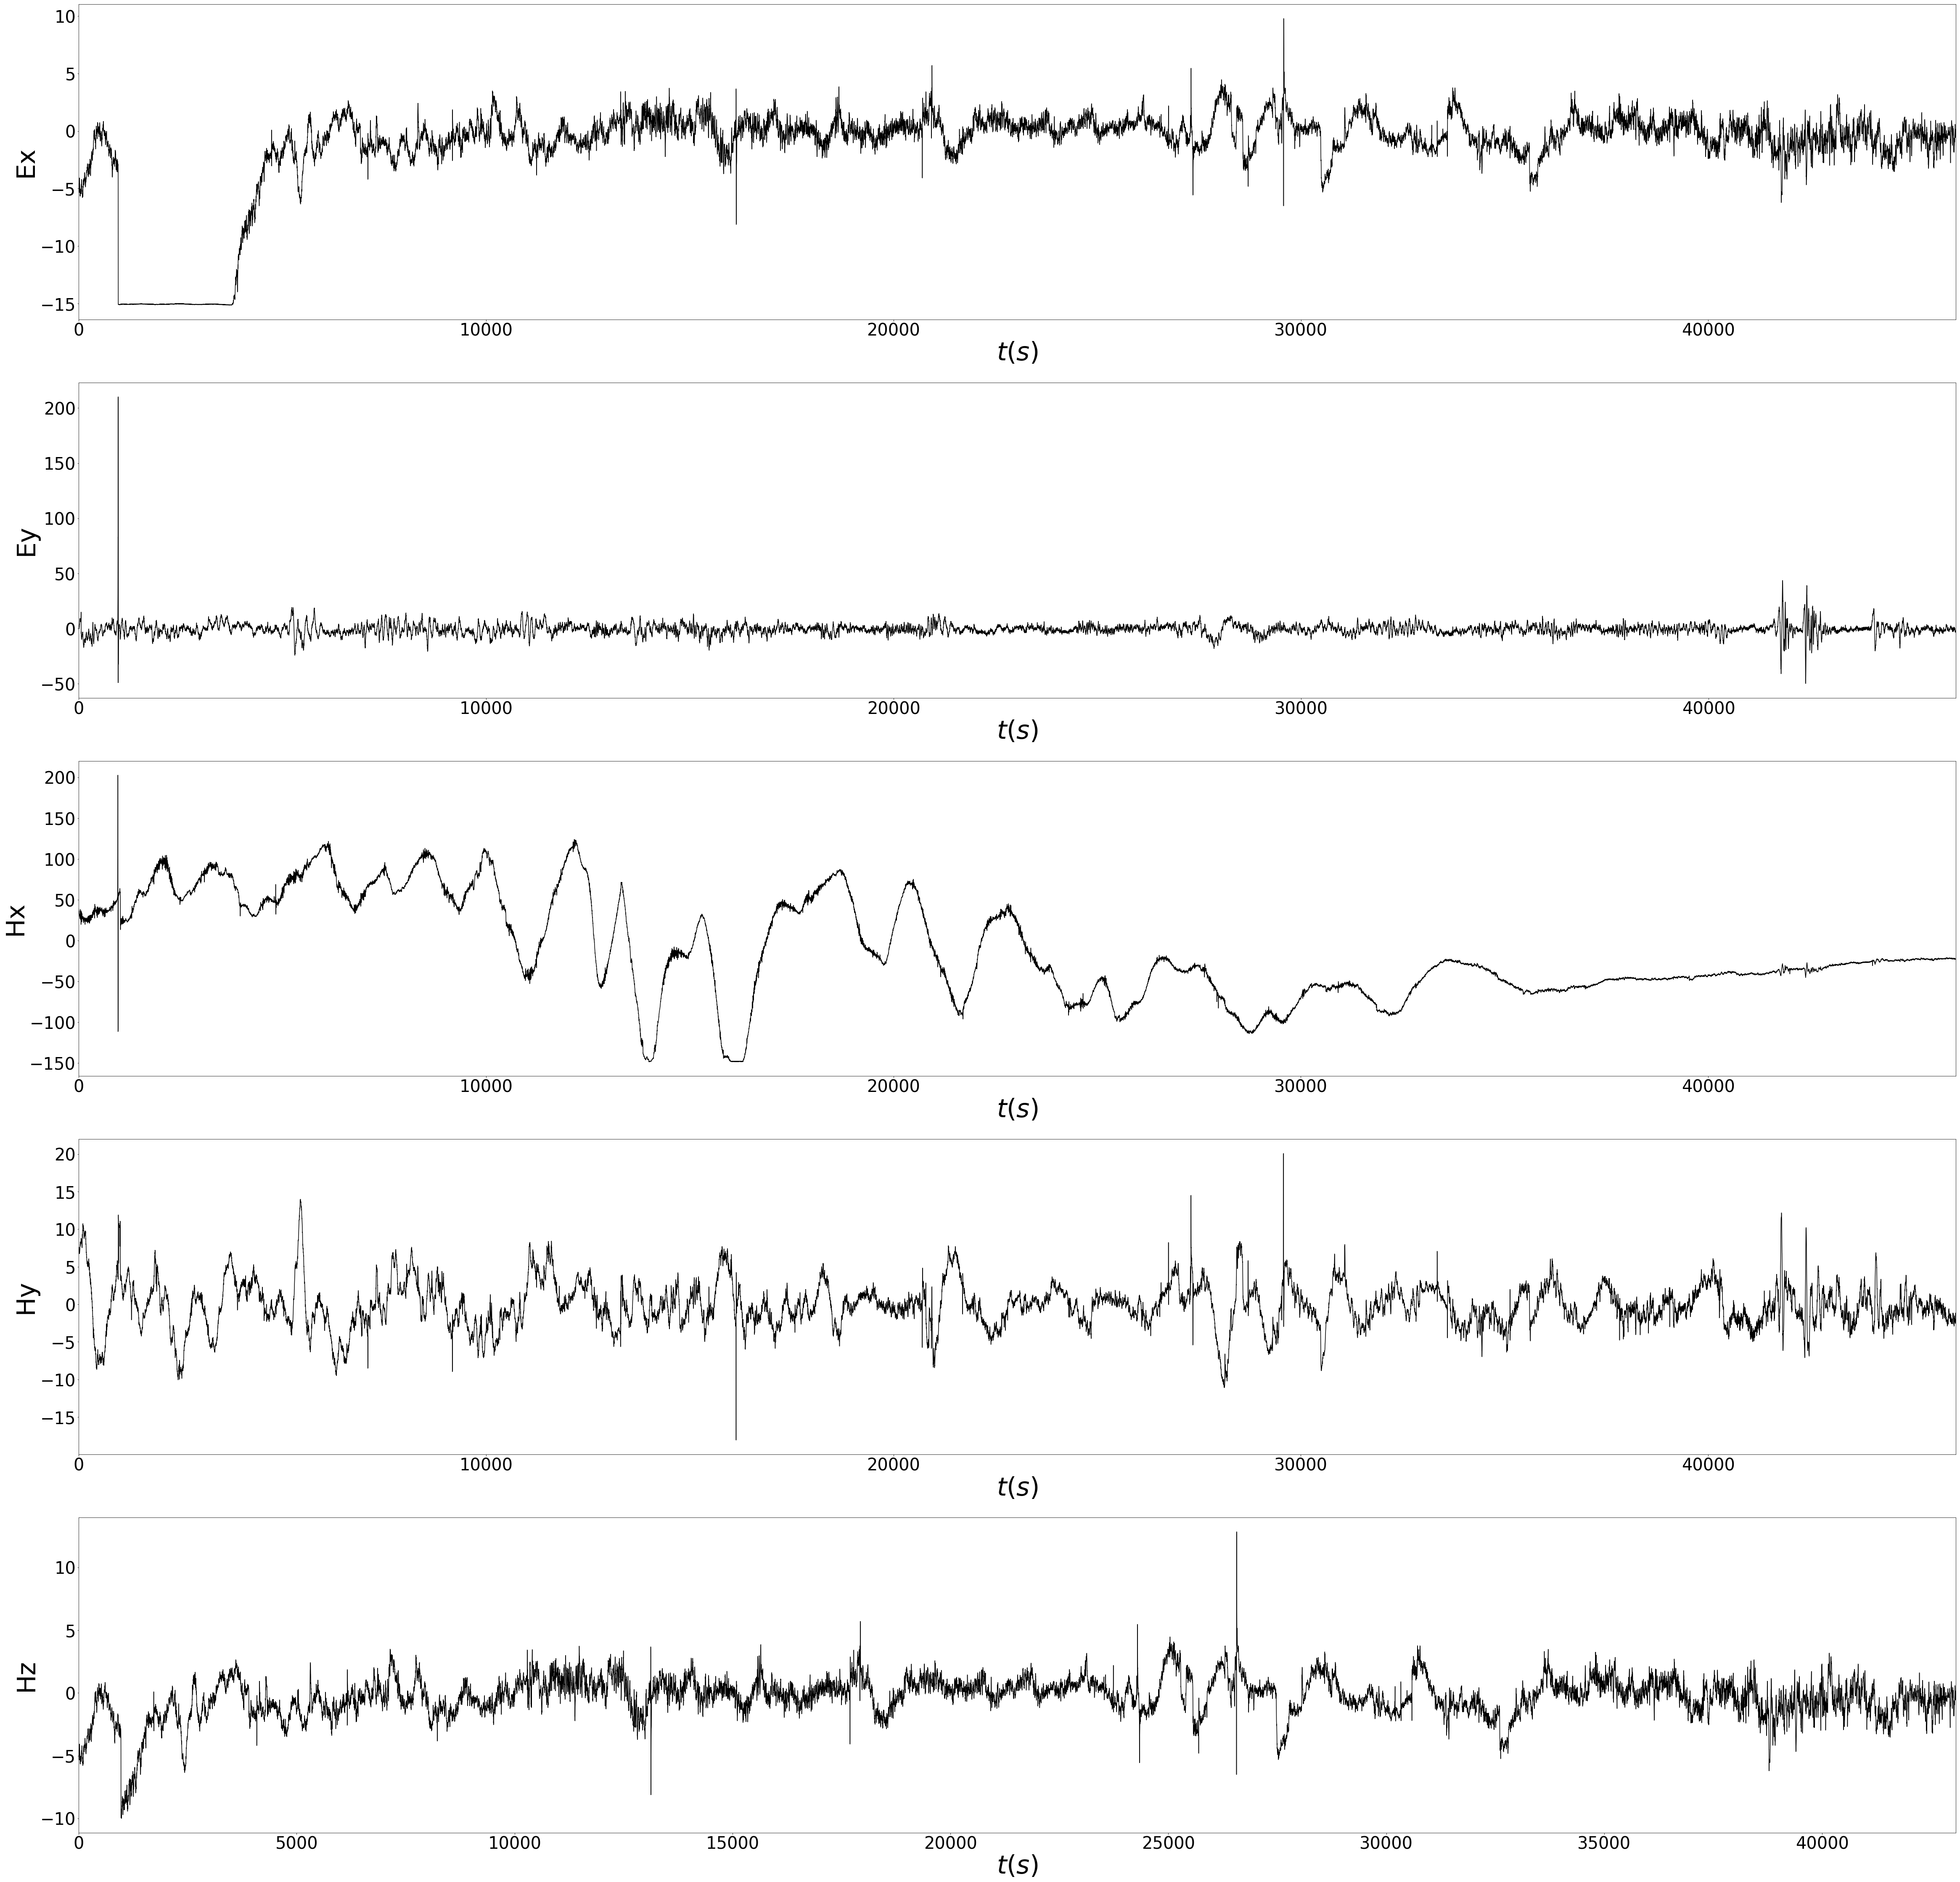

In [133]:
fig = plt.figure(figsize=(80,80))
gs1 = gridspec.GridSpec(len(TS4),1)

for i,j in enumerate(TS4):
    ax = fig.add_subplot(gs1[i])
    plt.ylabel(header[i], fontsize=60)
    plt.xlabel('$t(s)$', fontsize=60)
    ax.plot(np.arange(len(TS4[i])),j,'k')
    ax.set_xlim(min(np.arange(len(TS4[i]))),max(np.arange(len(TS4[i]))))
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)

#fig.savefig('ts.png', dpi=200)    

<h2 align='center'> Calculating the spectre to Bx,By,Bz,En,Ee,Es,Ew component  (Discrete Fourier Transform http://docs.scipy.org/doc/numpy/reference/routines.fft.html)</h2>

<h5> Setting the HANNING window, which one maximizes the energy in the main lobe of the window relative to total energy. </h5>

In [ ]:
N = len(ADE)
window = np.kaiser(N,6)
window = window/sum(np.convolve(window,window))

<h5> The spectrogram x-axis</h5>

In [ ]:
SR = 1 
fr = (1/(SR*N))*(np.arange(N)/2)

<h5> Normalization of the component</h5>

In [ ]:
component_data = []
for i,j in enumerate(data):
    component_data.append(j - np.mean(j))

<h5> Linear convolution between the component and the HANNING window</h5>

In [ ]:
component_w = [np.convolve(i, window) for i in component_data]

<h5> One-dimensional discrete Fourier Transform of the previous convolution . </h5>

In [ ]:
component_wf = [np.fft.fft(i) for i in component_w]

<h5> Linear convolution between the discrete Fourier Transform and his conjugate</h5>

In [ ]:
perd = [np.convolve(i,np.conjugate(i)) for i in component_wf]

<h5> Smoothness window size </h5>

In [ ]:
nsm = 13
smooth = np.ones(nsm)/nsm

<h5> Shift the convolution between the component and the smothness window to the center of the spectrum. </h5>

In [ ]:
spectrum = [np.fft.fftshift(np.convolve(np.fft.fftshift(i),smooth)) for i in perd]

<h2 align='center'>Plotting the Spectrogram</h2>

In [ ]:
fig = mpl.figure(figsize=(15,20))
gs1 = gridspec.GridSpec(len(spectrum),1)

for i,j in enumerate(spectrum):
    ax = fig.add_subplot(gs1[i])
    ax.plot(np.log(1/fr[:int(N/2)]),np.log(j[:int(N/2)]),'k',label=header[i])
    ax.legend(loc=2)